<a href="https://colab.research.google.com/github/gryffindor-guy/Prioritize-vaccine-delivery-using-AI-ML/blob/main/Newranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# loading datset which should be ranked
ds = pd.read_csv("india_covid_19_state_wise_info.csv")
ds.head()

,sl_no,state_ut,confirmed_cases,active_cases,recovered_cases,death_cases
0,2,Andaman and Nicobar Islands,3712,166,3494,52
1,1,Andhra Pradesh,646530,70357,570667,5506
2,3,Arunachal Pradesh,8133,2216,5903,14
3,4,Assam,163491,30182,132712,597
4,5,Bihar,172854,12958,159022,874


In [ ]:
ds1 = ds

In [ ]:
# finidng wethere there area any missing values
ds.isna().any()

sl_no              False
state_ut           False
confirmed_cases    False
active_cases       False
recovered_cases    False
death_cases        False
dtype: bool

In [ ]:
# Normalizing the data 
def apply():
  ds1["death_cases"] = (ds1["death_cases"]-(np.min(ds1["death_cases"])))/np.max(ds1["death_cases"])
  ds1["active_cases"] = (ds1["active_cases"]-(np.min(ds1["active_cases"])))/np.max(ds1["active_cases"])
  ds1["recovered_cases"] = (ds1["recovered_cases"]-(np.min(ds1["recovered_cases"])))/np.max(ds1["recovered_cases"])
apply()

In [ ]:
# Applying mathematical equation to derive results
ratio = ds["death_cases"]/(ds["death_cases"]+ds["recovered_cases"])
actrat = ratio*ds["active_cases"]
# checking wether there are any missing values in the resulting data
#actrat = actrat.replace(to_replace=np.nan,value=0.0)
actrat.isna().any()

True

In [ ]:
ds["probability"] = actrat

In [ ]:
ds.head()

,sl_no,state_ut,confirmed_cases,active_cases,recovered_cases,death_cases,probability
0,2,Andaman and Nicobar Islands,3712,0.000606,0.003655,0.001535,0.000179
1,1,Andhra Pradesh,646530,0.256887,0.596913,0.162486,0.054965
2,3,Arunachal Pradesh,8133,0.008091,0.006174,0.000413,0.000507
3,4,Assam,163491,0.110200,0.138816,0.017618,0.012411
4,5,Bihar,172854,0.047312,0.166336,0.025792,0.006351


In [ ]:
rank = np.arange(1,37)
rank

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])

In [ ]:
# sorting the data based on the probability
ds = ds.sort_values(by=['probability'],ascending=False)
del ds["sl_no"]

In [ ]:
ds.reset_index(drop=True, inplace=True)
ds.head()

,state_ut,confirmed_cases,active_cases,recovered_cases,death_cases,probability
0,Maharashtra,1263799,1.000000,1.000000,1.000000,0.500000
1,Karnataka,540847,0.345662,0.458050,0.243936,0.120115
2,Uttar Pradesh,369686,0.225271,0.316610,0.156377,0.074478
3,Tamil Nadu,557999,0.168864,0.525862,0.265892,0.056709
4,Andhra Pradesh,646530,0.256887,0.596913,0.162486,0.054965


In [ ]:
# Assigning ranks to states
ds["ranking"] = rank
ds.head(36)

,state_ut,confirmed_cases,active_cases,recovered_cases,death_cases,probability,ranking
0,Maharashtra,1263799,1.000000,1.000000,1.000000,0.500000,1
1,Karnataka,540847,0.345662,0.458050,0.243936,0.120115,2
2,Uttar Pradesh,369686,0.225271,0.316610,0.156377,0.074478,3
3,Tamil Nadu,557999,0.168864,0.525862,0.265892,0.056709,4
4,Andhra Pradesh,646530,0.256887,0.596913,0.162486,0.054965,5
5,Delhi,256789,0.112588,0.231024,0.150121,0.044345,6
6,Punjab,103464,0.077515,0.082889,0.088237,0.039969,7
7,West Bengal,234673,0.091649,0.214458,0.134097,0.035259,8
8,Chhattisgarh,93351,0.130895,0.059384,0.021484,0.034774,9
9,Madhya Pradesh,113057,0.083291,0.092223,0.061294,0.033255,10


In [ ]:
ds["probability"].sum()

1.2220881316640002

In [152]:
ds["newprob"] = ds["probability"]*100
ds.head(36)

,state_ut,confirmed_cases,active_cases,recovered_cases,death_cases,probability,ranking,newprob
0,Maharashtra,1263799,1.000000,1.000000,1.000000,0.500000,1,50.000000
1,Karnataka,540847,0.345662,0.458050,0.243936,0.120115,2,12.011535
2,Uttar Pradesh,369686,0.225271,0.316610,0.156377,0.074478,3,7.447832
3,Tamil Nadu,557999,0.168864,0.525862,0.265892,0.056709,4,5.670896
4,Andhra Pradesh,646530,0.256887,0.596913,0.162486,0.054965,5,5.496522
5,Delhi,256789,0.112588,0.231024,0.150121,0.044345,6,4.434493
6,Punjab,103464,0.077515,0.082889,0.088237,0.039969,7,3.996876
7,West Bengal,234673,0.091649,0.214458,0.134097,0.035259,8,3.525928
8,Chhattisgarh,93351,0.130895,0.059384,0.021484,0.034774,9,3.477434
9,Madhya Pradesh,113057,0.083291,0.092223,0.061294,0.033255,10,3.325512


In [153]:
ds["newprob"]=ds["newprob"]*0.8196

In [154]:
ds["newprob"].sum()

100.16234327118143

In [ ]:
ds.head(36)

In [ ]:
import matplotlib.pyplot as plt

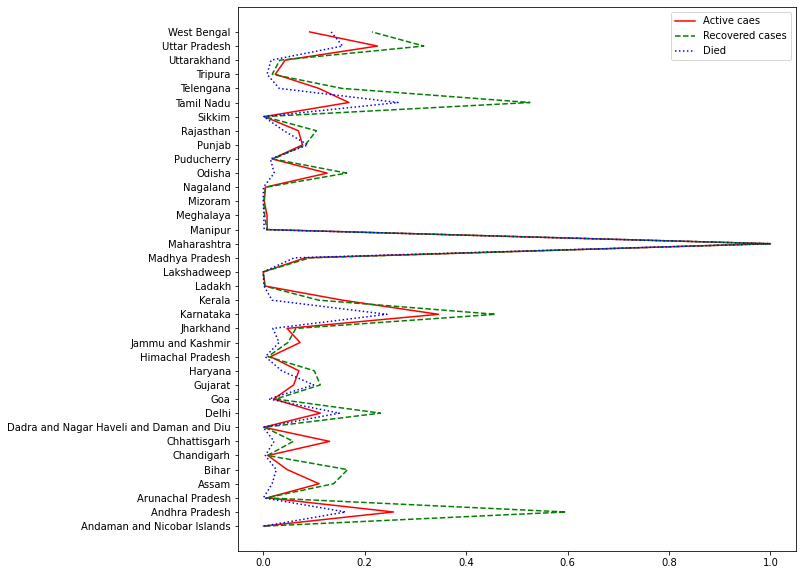

In [ ]:
# A plot between active,recovered,died cases with all states in india
y = ds1["state_ut"]
plt.figure(figsize= (10,10))
plt.plot(ds1["active_cases"],y,"r",label="Active caes")
plt.plot(ds1["recovered_cases"],y,"g",label ="Recovered cases",linestyle="--")
plt.plot(ds1["death_cases"],y,"b",label="Died",linestyle=":")
plt.legend()

In [ ]:
# importing plotly package used for building interactive charts
import plotly.express as px

In [ ]:
# plotting the graph between states and recovered cases
fig5 = px.bar(ds, x="state_ut", y="newprob", color='state_ut', text = 'newprob', orientation='v', height=600,width=1000,
             title='Percentage of vaccines to be supplied to respective states')
fig5.layout.template = 'plotly_dark'
fig5.show()

In [ ]:
import plotly.io as pio
pio.write_html(fig5, file="per.html", auto_open=True)